In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns
import ipywidgets as widgets
import requests

sns.set()

## Exploratory Data Analysis
### Overview

In [2]:
with pd.ExcelFile("data/can.xlsx") as xls:
    df_prices = pd.read_excel(xls,"Price",index_col=0,parse_dates=True)
    df_prices.columns = df_prices.columns.map(str)

with pd.ExcelFile("data/can.xlsx") as xls:
    df_info = pd.read_excel(xls,"Info",index_col=0)
    df_info.index = df_info.index.map(str)
    df_info.loc[:,"ISSUE DATE"] = pd.to_datetime(df_info["ISSUE DATE"],format="%d/%m/%Y")
    df_info.loc[:,"REDEMPTION DATE"] = pd.to_datetime(df_info["REDEMPTION DATE"],format="%d/%m/%y")

df_info.head()
#ISSUE DATE %d/%m%Y
#REDEMPTION DATE %d/%m%y
#COUPON DATES %d/%m

,ISIN CODE,NAME,COUPON,AMOUNT ISSUED,COUPON DATES,INDEX LINKED COUP,COUPONS PER YEAR,1ST COUPON VALUE,OTHER YIELD,RED. YIELD,CURRENCY,ISSUE DATE,MATURITY YEAR,START YEAR,ACTIVE,REDEMPTION DATE,REF CPI BASE
Type,,,,,,,,,,,,,,,,,
846111,CA135087VS05,CANADA 1995 4 1/4% 01/12/26 INDXLK.,7.6333,5250000.0,"01/06,01/12",4.25,2,2.06100,2.241,NaN,C$,1995-12-07 00:00:00,2026,1995,Active,2026-12-01 00:00:00,87.82571
610286,CA135087WV25,CANADA 1999 4% 01/12/31 INDXLK.,6.9046,5800000.0,"01/06,01/12",4.00,2,0.93150,2.129,NaN,C$,1999-03-08 00:00:00,2031,1999,Active,2031-12-01 00:00:00,91.38249
248402,CA135087XQ21,CANADA 2003 3% 01/12/36 INDXLK.,4.5947,5850000.0,"01/06,01/12",3.00,2,1.43840,2.100,NaN,C$,2003-06-09 00:00:00,2036,2003,Active,2036-12-01 00:00:00,102.99160
97059Q,CA135087YK42,CANADA 2007 2% 01/12/41 INDXLK.,2.8366,6550000.0,"01/06,01/12",2.00,2,0.98630,2.122,NaN,C$,2007-06-04 00:00:00,2041,2007,Active,2041-12-01 00:00:00,111.21849
5653HV,CA135087ZH04,CANADA 2010 1 1/2% 01/12/44 INDXLK.,2.0468,7700000.0,"01/06,01/12",1.50,2,0.00411,2.082,NaN,C$,2010-05-31 00:00:00,2044,2010,Active,2044-12-01 00:00:00,115.60000


In [3]:
df_prices.describe()

,846111,610286,248402,97059Q,5653HV,787NK8,849UMH,645HW9,49199C,597973,49197V,491985,491987,491989,49197U,491986,491970,491988,5771H1
count,7101.000000,6388.000000,5291.000000,4254.000000,3472.000000,2560.000000,1644.000000,595.000000,5066.000000,3220.000000,2042.000000,3089.000000,3350.000000,3611.000000,2651.000000,3220.000000,3174.000000,3481.000000,2434.000000
mean,131.523548,140.659286,137.296017,125.957902,121.250779,118.027191,99.411933,83.899106,81.427279,123.895963,93.834697,87.900612,86.977643,86.875287,88.202239,87.932411,86.273961,87.227865,90.442711
std,15.402941,17.718808,15.301789,14.941273,11.080769,11.938679,13.132456,14.599387,13.362473,12.519545,4.458731,10.957277,12.636888,14.121155,9.916209,11.801358,12.332432,13.382392,3.990232
min,91.270000,97.190000,96.380000,83.407000,90.095000,85.543000,70.040000,62.547000,53.700000,100.012000,84.340000,62.530000,58.100000,55.100000,66.960000,59.890000,59.560000,56.740000,79.110000
25%,121.046000,126.686250,125.490000,113.618750,114.745000,112.396500,91.504750,72.561500,71.290500,111.268000,89.898500,82.770000,79.633100,78.403200,74.270000,81.808250,80.821250,79.170000,87.855000
50%,132.271000,145.215000,140.085000,130.043000,122.686500,118.104000,99.040500,77.984000,78.861500,127.878000,95.527000,92.682000,91.165500,88.909000,91.471000,92.402000,92.423000,90.396000,92.762000
75%,143.390000,152.328000,148.416500,137.485000,129.272250,126.102250,109.214500,100.148000,95.691000,132.350000,95.527000,95.736000,98.136500,98.442000,96.447000,97.954500,92.522000,98.467000,92.762000
max,163.310000,177.060000,167.760000,151.729000,144.881000,144.432000,126.483000,113.357000,99.632000,144.160000,100.299000,100.645000,103.258000,110.655000,97.066000,101.441000,101.604000,107.468000,94.478000


## Historical Prices

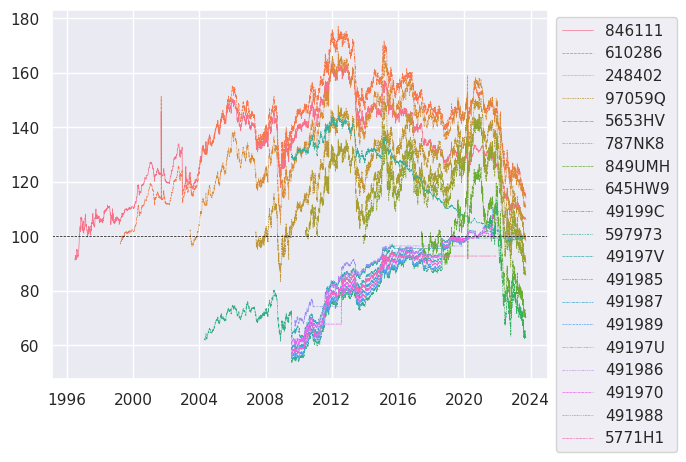

In [4]:
fig, ax = plt.subplots()
sns.lineplot(df_prices,linewidth=0.5,ax=ax)
ax.axhline(y=100,linestyle="--",color="black",linewidth=0.5)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

### Maturities and reported Market Data

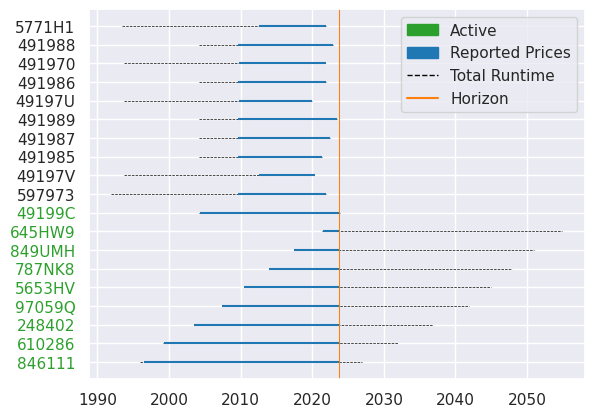

In [5]:
y = list(range(len(df_prices.columns)))
#available data
xmin = [min(df_prices[col].dropna().index) for col in df_prices.columns] 
xmax = [max(df_prices[col].dropna().index) for col in df_prices.columns]

#issue, maturity
issue_dates = [df_info.loc[bond,"ISSUE DATE"] for bond in df_prices.columns]
redem_dates = [df_info.loc[bond,"REDEMPTION DATE"] for bond in df_prices.columns]

fig, ax = plt.subplots()
plt.hlines(y=y,xmin=issue_dates,xmax=redem_dates, colors="black", linestyles="dashed", linewidths = .5)
plt.hlines(y=y,xmin=xmin,xmax=xmax,colors="tab:blue")
ax.axvline(x = max(df_prices.index),color="tab:orange",linewidth=0.75)
ax.set_yticks(list(range(len(df_prices.columns))))
ax.set_yticklabels(df_prices.columns)

for t in ax.yaxis.get_ticklabels():
    if df_info.loc[t.get_text(),"ACTIVE"] == "Active":
        t.set_color("tab:green")

plt.legend(handles=[mpatches.Patch(color="tab:green",label="Active"),
                    mpatches.Patch(color="tab:blue",label="Reported Prices"),
                    mlines.Line2D([0],[0],color="black",linestyle="dashed",linewidth=1, label="Total Runtime"),
                   mlines.Line2D([0],[1],color="tab:orange",label = "Horizon")])

#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

In [6]:
bond_dropdown = widgets.Dropdown(description="Bond",options=list(map(lambda t:t[::-1],list(df_info[["NAME"]].itertuples(name=None)))))

def plot_hist_prices(bond):
    fig,ax = plt.subplots()
    sns.lineplot(df_prices,x=df_prices.index,y=bond,ax=ax,label=bond,linewidth=.75)
    ax.axhline(y=100,linestyle="--",color="black",linewidth=1)
    ax.set_ylabel("")
    ax.set_xlabel("")
    plt.show()

    display(df_info.loc[bond,:])

out_0 = widgets.interactive_output(plot_hist_prices,{"bond":bond_dropdown})
display(bond_dropdown,out_0)

Dropdown(description='Bond', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 1999 4% 01/1…

Output()

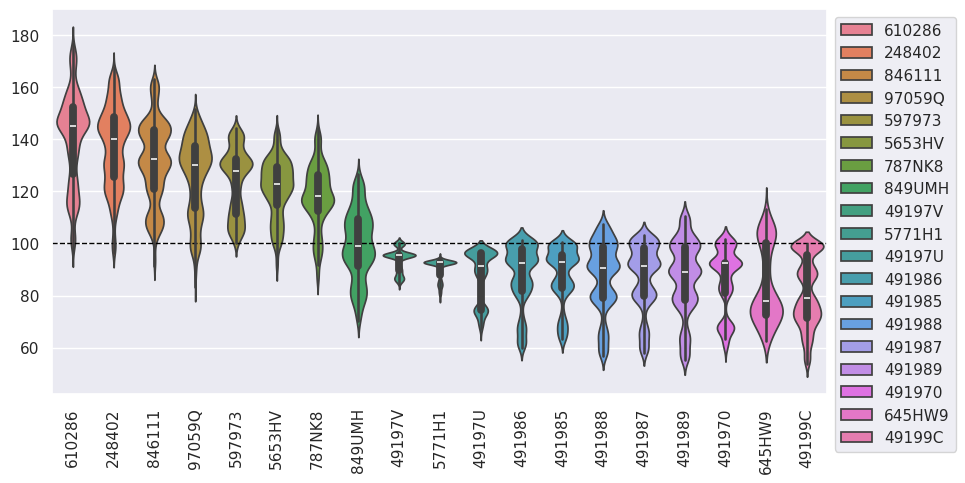

In [7]:
fig, ax = plt.subplots(figsize=(10,5))
ax.axhline(y=100,linestyle="--",color="black",linewidth=1)
sns.violinplot(df_prices.reindex(df_prices.mean().sort_values(ascending=False).index, axis=1),ax = ax,legend=True)
plt.xticks(rotation=90)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

plt.show()

## Interest Rates
TODO: [source](lökhf)

,description
id,
V80691311,Prime rate
V80691333,1-year Conventional mortgage
V80691334,3-year Conventional mortgage
V80691335,5-year Conventional mortgage
V80691339,1-year Guaranteed investment certificates
V80691340,3-year Guaranteed investment certificates
V80691341,5-year Guaranteed investment certificates
V80691336,5-year personal fixed term
V80691337,"Daily Interest Savings (balances over $100,000)"


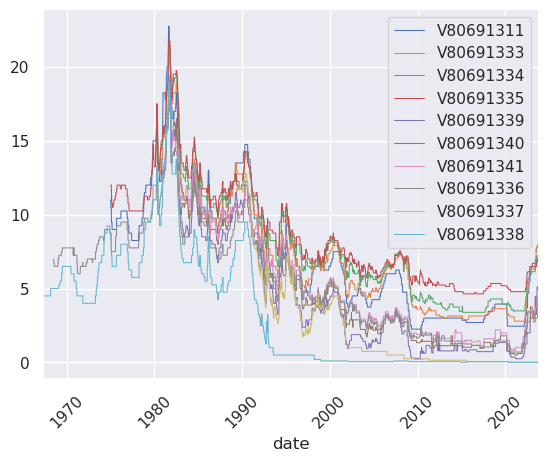

In [8]:
df_interest = pd.read_csv("data/chartered_bank_interest.csv",index_col="date",parse_dates=True)
df_interest_info  =  pd.read_csv("data/chartered_bank_interest_info.csv",index_col = "id")
df_interest_info.replace(np.nan,"",inplace=True)
df_interest_info["description"] = df_interest_info["label"]+" "+df_interest_info["description"]
df_interest_info = df_interest_info.loc[:,["description"]]

display(df_interest_info)

fig, ax = plt.subplots()
df_interest.plot(ax = ax,linewidth=0.75)
plt.xticks(rotation=45)
plt.show()

### Bond Market Prices vs. Interest Rates

In [9]:
interest_rate_dropdown = widgets.Dropdown(description="Interest",options=list(map(lambda t: t[::-1],df_interest_info[["description"]].itertuples(name=None))))

def plot_price_vs_interest_rate(bond,rate,**kwargs):
    min_date,max_date = min(df_prices[bond].dropna().index), max(df_prices[bond].dropna().index)
    df_interest_temp = df_interest.loc[min_date:max_date,:]
    
    with sns.axes_style("dark"):
        fig,ax = plt.subplots()
        ax1 = plt.twinx()
        
    sns.lineplot(df_prices,x=df_prices.index,y=bond,ax=ax,linewidth=.75)
    ax.axhline(y=100,linestyle="--",color="black",linewidth=.5)
    
    sns.lineplot(df_interest_temp,x=df_interest_temp.index,y=rate,ax=ax1,color="tab:red",linewidth=0.75)

    ax.set_ylabel("Bond Price",color="tab:blue")
    ax1.set_ylabel("Interest Rate",color="tab:red")
    ax.set_xlabel("")
    ax1.set_xlabel("")
    
    plt.show()
    display(df_info.loc[bond,:])


out_1 = widgets.interactive_output(plot_price_vs_interest_rate,{"bond":bond_dropdown,"rate":interest_rate_dropdown})
display(bond_dropdown,interest_rate_dropdown,out_1)

Dropdown(description='Bond', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 1999 4% 01/1…

Dropdown(description='Interest', options=(('Prime rate ', 'V80691311'), ('1-year Conventional mortgage', 'V806…

Output()

## Cashflow Structure and Nominal Coupon Payments 

In [10]:
coupons_only_checkbox = widgets.Checkbox(description = "Coupons only")
bond_dropdown_solo = widgets.Dropdown(description="Bond",options=list(map(lambda t:t[::-1],list(df_info[["NAME"]].itertuples(name=None)))))

def plot_cf(bond,coupons_only):

    issue_date = df_info.loc[bond,"ISSUE DATE"]
    redem_date = df_info.loc[bond,"REDEMPTION DATE"]
    freq = df_info.loc[bond,"COUPONS PER YEAR"]
    
    
    if freq == 2: #semi-annual: 01.06 und 01.12.
        dt_idx = pd.date_range(start=issue_date,end=redem_date,freq="AS-JUN").append(pd.date_range(start=issue_date,end=redem_date,freq="AS-DEC"))
        coupon = df_info.loc[bond,"INDEX LINKED COUP"]/freq
        df_coupon = pd.DataFrame(coupon,index=dt_idx,columns=["Coupon"])
    elif freq == 1: #not in the set
        pass
    else:
        df_coupon = pd.DataFrame(columns=["Coupon"])

    df_coupon.loc[issue_date,"Initial"] = -100
    df_coupon.loc[redem_date,"Redemption"] = 100
    df_cf = df_coupon.loc[df_coupon.index.sort_values(),:]

    fig, ax = plt.subplots(figsize=(12,4))
    
    if coupons_only:
        df_cf.plot(y="Coupon",kind="bar",ax=ax)
    else:
        df_cf.plot(kind="bar",ax=ax,stacked=True) 
    
    plt.xticks(rotation=90)
    
    plt.show()
    display(f"Issue Date: {issue_date.date()} | Redemption Date: {redem_date.date()}")
    with pd.option_context("display.max_rows", 8):
        display(df_cf)

out_2 = widgets.interactive_output(plot_cf,{"bond":bond_dropdown_solo,"coupons_only":coupons_only_checkbox})
display(bond_dropdown_solo,coupons_only_checkbox,out_2)

Dropdown(description='Bond', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 1999 4% 01/1…

Checkbox(value=False, description='Coupons only')

Output()

## CPI - Base CPI - Index Ratio
Calculation based upon: All-items Consumer Price Index for Canada, not seasonally
adjusted, as published by Statistics Canada. <br>
$$Ref CPI_{07/12/2010}=CPI_{09/2010}+\frac{7-1}{31}\big( CPI_{10/2012} - CPI_{09/2010} \big)$$
$$IR_t = \frac{Ref CPI_{t}}{Ref CPI_{\tau}}$$
Where $t$ is a specific date and $\tau$ is the issue date of the bond. <br>
>INFO: Claculation is tested and precise for the Dates t but shows minimal deviation for base (=issue) dates; Thus, for non-strip bonds the reference index values from Bank of Canada, Index Ratios can be used.
>
TODO [source](kljgdfg)

In [113]:
class RefCPI():
    def __init__(self, index="All-items"):
        df = pd.read_csv("data/cpi.csv",index_col="REF_DATE")
        df.index = df.index.map(lambda d: dt.datetime.strptime(d,"%Y-%m"))
        self.df = df[df["Products and product groups"]== index]
        self.available_indices = df["Products and product groups"].unique()

    def ref_cpi(self,t:pd.Timestamp,lag=3)->float:
        """
        Berechnet den Ref CPI für ein Datum t lt. Bank of Canada, Real Return Bonds, pp. 1-2.
        Basis: CPI All items, seasonally not adjusted 1991 - 2023.
        params:
            t: pd.Timestamp: Das betrachtete Datum, für welches der Ref CPI berechnet werden soll.
            lag: int: Die Anzahl der Monate, die ausgehend von t bis zum jeweiligen Ersten zurückgegangen werden muss; default = 3.
        returns:
            float: Ref CPI für ein Datum t gerundet auf 5 Dezimalstellen (Bank of Canada, Real Return Bonds, p.1)
        """
        d,n = t.day, t.days_in_month
        ref_date = t - pd.DateOffset(months=lag, day=1)
        #print(ref_date, ref_date + pd.DateOffset(months=1,day=1))
        cpi_0 = self.df.loc[ref_date,"VALUE"]
        cpi_1 = self.df.loc[ref_date + pd.DateOffset(months=1, day=1),"VALUE"]

        return round(cpi_0 + ((d-1)/n) * (cpi_1 - cpi_0),ndigits=5)

    def index_ratio(self, t:pd.Timestamp,base:pd.Timestamp)->float:
        """
        Berechnet den Index Ratio für ein Datum t und Basisdatum (=issue date) base lt. Bank of Canada, Real Return Bonds, pp. 1-2.
        params:
            t: pd.Timestamp: Das betrachtete Datum, für welches der IR berechnet werden soll.
            base: pd.Timestamp: Das Basisdatum, für welches der Ref CPI berechnet werden soll (= issue date des Bonds).
        returns:
            float: IR für Datum t und base gerundet auf 5 Dezimalstellen (Bank of Canada, Real Return Bonds, p.1)
        """
        return round(self.ref_cpi(t)/RefCPI.ref_cpi(base),ndigits=5)

ref_cpi = RefCPI()

In [116]:
ref_cpi.df.head()

,GEO,DGUID,Products and product groups,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
REF_DATE,,,,,,,,,,,,,,
1991-01-01,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,82.0,NaN,NaN,NaN,1
1991-02-01,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,82.0,NaN,NaN,NaN,1
1991-03-01,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,82.3,NaN,NaN,NaN,1
1991-04-01,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,82.3,NaN,NaN,NaN,1
1991-05-01,Canada,2016A000011124,All-items,2002=100,17,units,0,v41690973,2.2,82.7,NaN,NaN,NaN,1


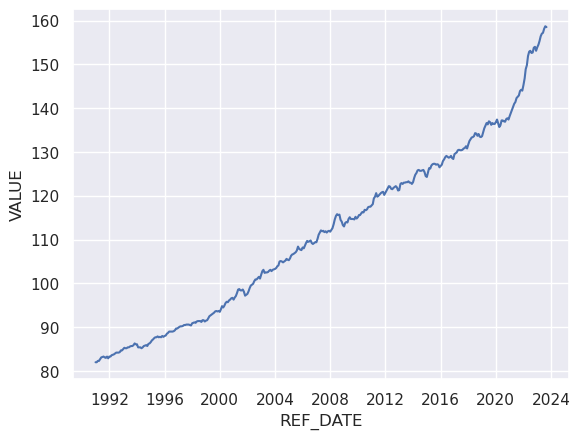

In [13]:
sns.lineplot(data=ref_cpi.df,x="REF_DATE",y="VALUE")
plt.show()

### Deviation Ref CPI Calculation - BoC Reporting
Deviation for issue dates < 2010 <br>
TODO [source](köugsagf)

In [14]:
def show_base_cpi_deviation(bond):
    print(bond, " ",df_info.loc[bond,"NAME"])
    
    base = df_info.loc[bond,"ISSUE DATE"]
    boc_cpi = df_info.loc[bond,"REF CPI BASE"]
    
    print("Issue Date: ",base)
    print("Calculation: ", ref_cpi.ref_cpi(base)) 
    print("Bank of Canada: ", boc_cpi)

out_3 = widgets.interactive_output(show_base_cpi_deviation,{"bond":bond_dropdown})

display(bond_dropdown, out_3)

Dropdown(description='Bond', options=(('CANADA 1995 4 1/4% 01/12/26 INDXLK.', '846111'), ('CANADA 1999 4% 01/1…

Output()

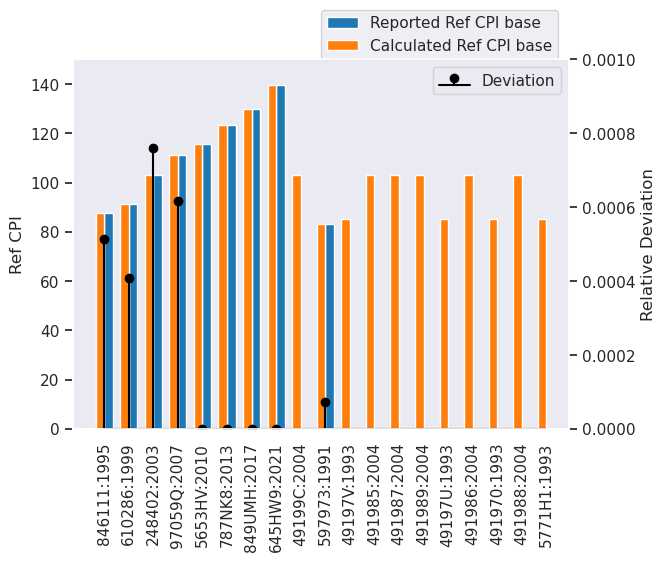

In [15]:
issue_dates = [df_info.loc[bond,"ISSUE DATE"] for bond in df_prices.columns]
cpi_reals = [df_info.loc[bond,"REF CPI BASE"] for bond in df_prices.columns]
cpi_calcs = [ref_cpi.ref_cpi(issue_date) for issue_date in issue_dates]
diff = [abs(a-b)/a for a,b in zip(cpi_reals,cpi_calcs)]
labels = [n+":"+d.strftime("%Y") for n,d in zip(df_prices.columns,issue_dates)]

with sns.axes_style("dark"):
    fig,ax = plt.subplots()
    ax1 = plt.twinx()

ax.bar(x=range(len(df_prices.columns)),height=cpi_reals,align="edge",width=0.35,color="tab:blue",label="Reported Ref CPI base")
ax.bar(x=range(len(df_prices.columns)),height=cpi_calcs,align="edge",width=-0.35,color="tab:orange",label="Calculated Ref CPI base")

ax1.stem(range(len(df_prices.columns)),diff,linefmt="black",markerfmt="o",basefmt="black",label="Deviation")

ax.set_ylim(0,150)
ax1.set_ylim(0,0.001)

ax.set_xticks(range(len(df_prices.columns)),labels=labels,rotation=90)
ax.set_ylabel("Ref CPI")
ax1.set_ylabel("Relative Deviation")

ax.legend(loc=(0.5,1))
ax1.legend()
plt.show()

# Bond Evaluation

In [166]:
class Bond():
    """
    id: str
    name: str
    issue_date: pd.Timestamp 
    redem_date: pd.Timestamp
    prices: pd.Series: The timeseries of market prices where the respective index of type pd.DatetimeIndex
    coupon: float (nominal coupon)
    coupon_dates: list of strings: e.g.['AS-JUN','AS-DEC']: yearly on the first of June and first of December. See pd.date_range! If 
        the list is empty, the bond ist calculated as a zero coupon bond.
    """
    def __init__(self,id,name,issue_date,redem_date,prices,coupon,coupon_freq=[]):
        self.id = id
        self.name = name
        self.issue_date = issue_date
        self.redem_date = redem_date
        self.prices = prices.dropna()
        self.coupon = coupon
        self.freq = len(coupon_freq)
        self.coupon_freq = coupon_freq

    def __coupon_dates(self)->pd.DatetimeIndex:
        """
        Returns all coupon dates within the total runtime (issue_date to redem_date) of the bond in chronological order.
        """

        dt_idx = pd.DatetimeIndex([])
        if self.freq > 0:
            for cf_date in self.coupon_freq:
                dt_idx = dt_idx.append(pd.date_range(start=self.issue_date,end=self.redem_date,freq=cf_date))
        
        return dt_idx.sort_values().unique()
        
    
    def cashflows(self, evaluation_date:pd.Timestamp,dirty=True,daycount="act/365",force=False)->pd.Series:
        """
        A chronological ordered series of cashflows that starts with the negative price at evaluation date (=settlement_date).
        dirty: bool: If True, calculates the accrued interest and adds it to the first cashflow (purchase).
        force: bool: If True, assumes par value (100) for the market price if no price is reprted for the given evaluation date.
        """
        try:
            p = self.prices.loc[evaluation_date]
        except KeyError:
            print(f"No market price is reported for the evaluation date {evaluation_date.strftime("%Y-%m-%d")}.")
            if force:
                print(f"Assume par value for the evaluation date {evaluation_date.strftime("%Y-%m-%d")}!")
                p = 100
            else:
                print("You can force a cashflow with passing force=True. This assumes the non-existent price at evaluation date to trade at par (=100).")

        all_cf_dates = self.__coupon_dates().append(pd.DatetimeIndex([self.issue_date,self.redem_date,evaluation_date])).sort_values().unique()
        
        cf_dates = all_cf_dates[all_cf_dates>=evaluation_date]
        cp_dates = self.__coupon_dates()[self.__coupon_dates()>=evaluation_date]

        cfs = pd.Series(data=0.0,index=cf_dates)

        #Accrued interest evaluation for dirty price
        acc_interest = 0
        if daycount == "act/365":
            days_between_cps = 365/2
        elif daycount == "act/360":
            days_between_cps = 360/2
        else:
            raise NotImplementedError(f"Day count convention {daycount} not implemented.")
            
        if dirty:
            p_loc = all_cf_dates.get_loc(evaluation_date)
            if p_loc > 0 and self.freq > 0: #kein zero bond
                previous_cp_date = all_cf_dates[p_loc - 1]
                days_since_last_cp = (evaluation_date - previous_cp_date).days
                acc_interest = (self.coupon/self.freq) * (days_since_last_cp/days_between_cps)

        cfs.loc[evaluation_date] -= p + acc_interest
        if self.freq > 0: #sonst keine coupons, weil zero bond
            cfs.loc[cp_dates] = self.coupon/self.freq
        cfs.loc[self.redem_date] += 100

        return cfs
        
    def ytm(self,evaluation_date:pd.Timestamp,dirty=True,daycount="act/365",force=False):
        """
        evaluation_date: pd.Timestamp: Date for which to evaluate the bond (fictional purchase day).
        dirty: bool: If true, the first cashflow includes accured interest for the days since the last coupon.
        daycount: str: The daycount convention to use for coupon payments; one of 'act/act', 'act/360', 'act/365'
        Solves for the internal rate in the sum of all discounted cashflows starting from evaluation_date to redemption date.
        -p + sum cp_t/(1+r)**(delta_d/365) + fv/(1+r)**(delta_d/365) = 0
        """
        
        cfs = self.cashflows(evaluation_date,dirty=dirty,daycount=daycount,force=force)
        
        if daycount == "act/365":
            days_in_year = 365
        elif daycount == "act/360":
            days_in_year = 360
        else:
            raise NotImplementedError(f"Day count convention {daycount} not implemented.")

        delta_days = cfs.index - evaluation_date

        def pv(r):
            s = 0
            for cf, dd in zip(cfs.values,delta_days.days):
                s += cf/(1+r)**(dd/days_in_year)
            return s

        r = sp.optimize.newton(pv,self.coupon/100)
    
        return r
        

class ILB(Bond):
    """
    ref_cpi_base: float: If no value is specified the reference CPI is calculated based on the issue date of the ILB.
    """
    def __init__(self,*args,ref_cpi_base:float=None,**kwargs):
        super().__init__(*args,**kwargs) #args und kwargs, die das parent braucht
        if ref_cpi_base:
            self.ref_cpi_base = ref_cpi_base
        else:
            ref_cpi = RefCPI()
            self.ref_cpi_base  = ref_cpi.ref_cpi(self.issue_date)
        
    def ytm(self, evaluation_date, *args,  **kwargs):
        pass

### Evaluation of Nominal Bonds - Example
Checked back and verified with [Vindeep](https://vindeep.com/Corporate/BondYTMCalculator.aspx)

#### Coupon Bond

In [17]:
df_info.loc["597973",:]

ISIN CODE                                   CA135087UL60
NAME                 CANADA 1991 4 1/4% 01/12/21 INDXLK.
COUPON                                            7.3104
AMOUNT ISSUED                                  5175000.0
COUPON DATES                                 01/06,01/12
INDEX LINKED COUP                                   4.25
COUPONS PER YEAR                                       2
1ST COUPON VALUE                                   2.026
OTHER YIELD                                       -3.635
RED. YIELD                                           NaN
CURRENCY                                              C$
ISSUE DATE                           1991-12-10 00:00:00
MATURITY YEAR                                       2021
START YEAR                                          1991
ACTIVE                                              Dead
REDEMPTION DATE                      2021-12-01 00:00:00
REF CPI BASE                                    83.07713
Name: 597973, dtype: object

In [167]:
bnd_id = "597973"
name = df_info.loc[bnd_id,"NAME"]
issue_date = df_info.loc[bnd_id,"ISSUE DATE"]
redem_date = df_info.loc[bnd_id,"REDEMPTION DATE"]
prices = df_prices[bnd_id]
coupon = df_info.loc[bnd_id,"INDEX LINKED COUP"]

bond = Bond(bnd_id,name,issue_date,redem_date,prices,coupon,coupon_freq=["AS-DEC","AS-JUN"])

In [168]:
eval_date = pd.Timestamp("2018-07-23")
cfs = bond.cashflows(eval_date,dirty=True,daycount="act/365")
cfs
#df_prices.loc[eval_date,bnd_id]

2018-07-23   -113.487479
2018-12-01      2.125000
2019-06-01      2.125000
2019-12-01      2.125000
2020-06-01      2.125000
2020-12-01      2.125000
2021-06-01      2.125000
2021-12-01    102.125000
dtype: float64

In [169]:
bond.ytm(eval_date)

0.0038451369790610222

In [172]:
# If no market price is reported for a specific evaluation_date, one can force a cashflow: 
# the missing price will simply be subsituted by the par value.
bond.cashflows(issue_date,force=True)

No market price is reported for the evaluation date 1991-12-10.
Assume par value for the evaluation date 1991-12-10!


1991-12-10   -100.000
1992-06-01      2.125
1992-12-01      2.125
1993-06-01      2.125
1993-12-01      2.125
               ...   
2019-12-01      2.125
2020-06-01      2.125
2020-12-01      2.125
2021-06-01      2.125
2021-12-01    102.125
Length: 61, dtype: float64

,cf,dd
2018-07-23,-113.487479,0
2018-12-01,2.125000,131
2019-06-01,2.125000,313
2019-12-01,2.125000,496
2020-06-01,2.125000,679
2020-12-01,2.125000,862
2021-06-01,2.125000,1044
2021-12-01,102.125000,1227


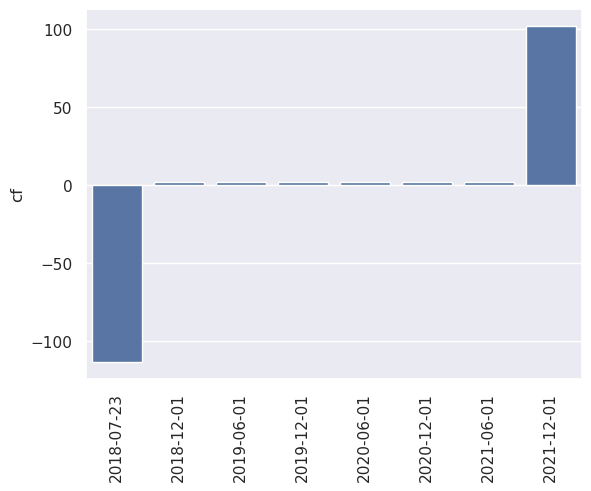

In [173]:
df = pd.DataFrame(cfs,columns=["cf"])
df["dd"] = (cfs.index-eval_date).days
fig,ax = plt.subplots()
sns.barplot(df,x=df.index,y="cf",ax=ax)
plt.xticks(rotation=90)
plt.xlabel("")
display(df)
plt.show()

#### Zero Bond
`Coupon = 0` <br>
`Coupon Dates = []` <br>
`dirty = False`: No accrued interest - no dirty price!

In [174]:
bnd_id = "597973"
name = df_info.loc[bnd_id,"NAME"]
issue_date = df_info.loc[bnd_id,"ISSUE DATE"]
redem_date = df_info.loc[bnd_id,"REDEMPTION DATE"]
prices = df_prices[bnd_id]
coupon = 0

zero_bond = Bond(bnd_id, name, issue_date, redem_date, prices, coupon)

In [176]:
zero_bond.cashflows(eval_date, dirty=False, force=False)

2018-07-23   -112.882
2021-12-01    100.000
dtype: float64

In [159]:
zero_bond.ytm(eval_date)

-0.035403799362747734

### CHECK: YTM

In [21]:
import scipy as sp

def pv(r):
    s = 0
    for cf, dd in zip(df["cf"].values,df["dd"].values):
        s += cf/(1+r)**(dd/365)
    return s
display(df)
sp.optimize.newton(pv,4.25/100)

,cf,dd
2018-07-23,-112.882,0
2018-12-01,2.125,131
2019-06-01,2.125,313
2019-12-01,2.125,496
2020-06-01,2.125,679
2020-12-01,2.125,862
2021-06-01,2.125,1044
2021-12-01,102.125,1227


0.0055430718642280165

## Missing Market Data Handling

In [22]:
ddiffs = []
for bond in df_prices.columns:
    first_date = df_prices[bond].dropna().index[0]
    last_date = df_prices[bond].dropna().index[-1]
    
    start_date = pd.to_datetime(dt.datetime.strptime(df_info.loc[bond,"ISSUE DATE"],"%d/%m/%Y"))
    end_date = pd.to_datetime(dt.datetime.strptime(df_info.loc[bond,"REDEMPTION DATE"],"%d/%m/%y"))

    print(bond, df_info.loc[bond,"NAME"], df_info.loc[bond,"ACTIVE"])
    print("first date: ", first_date, "issue date: ",start_date)
    print("last date: ", last_date, "redemption date: ", end_date)
    print()

TypeError: strptime() argument 1 must be str, not Timestamp

# Bond Evaluation

In [ ]:
class Bond():
    def __init__(self,*args,**kwargs):
        pass
    def cashflows(self,evaluation_date,*args,**kwargs):
        """
        freq: Frequency of coupon payments: semi-annual: freq=2, annual: freq=1, Zero Bond:freq = 0 
        c: coupon: c = 100 * r_pa/freq if freq > 0 else 0
        r_pa: nominal rate p.a.
        r_pd: nominal rate p.d.: r_pd = r_pa/365
        delta_d: datediff in days: cashflow_date - evaluation_date
        """
        
        pass
    def ytm(self,evaluation_date):
        #scipy.optimize.newton
        pass
    def break_even_rate(self,other,*args,**kwargs):
        pass
    def __repr__(self):
        return self.name

# Bank of Canada API

In [ ]:

base_url = "https://www.bankofcanada.ca/valet/"
r = requests.get(base_url+"observations/INDEX_RATIO_2021/csv")

In [ ]:
print(r.text)